# Метод имитации отжига

In [1]:
from scipy.optimize import basinhopping
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
%matplotlib inline

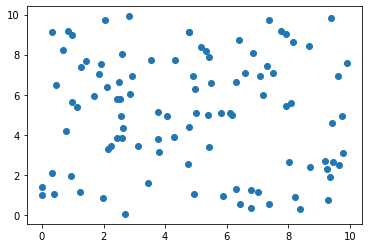

In [2]:
a = np.random.uniform(low=0, high=10, size=(100, 2))
plt.plot(a[:, 0], a[:, 1], 'o')

In [3]:
def simulatedannealing(L, tmax, tmin):
    N = len(L)
    t = tmax
    current_state = np.random.choice(np.arange(0, N), size=N, replace=False)
    def dist(L):
        total_dist = 0
        for i in range(1, len(L) - 1):
            dist = euclidean(L[i], L[i-1])
            total_dist += dist
        total_dist += euclidean(L[0], L[len(L) - 1])
        return total_dist
    
    current_dist = dist(L[current_state])
    
    def generate_state(current_state):
        state = current_state.copy()
        rv = sorted(np.random.choice(np.arange(0, len(state)), replace=False, size=2))
        state2 = state[rv[0]: rv[1] + 1].copy()
        state[rv[0]: rv[1] + 1] = state2[::-1]
        return state
        
    
    def get_trans_prob(D0, D, t): 
        return np.random.uniform() <= np.exp(-(D - D0) / t)
    
    for x in range(1, 100000):
        new_state = generate_state(current_state)
        new_dist = dist(L[new_state])
        if (new_dist <= current_dist) or (get_trans_prob(current_dist, new_dist, t)): 
            current_state = new_state
            current_dist = new_dist
        else: 
            pass
        t = tmax * 0.1 / x
        if t < tmin: 
            break

    
    return L[current_state]

In [ ]:
a = np.random.uniform(low=1, high=10, size=(100, 2))
b = simulatedannealing(a, 10, 0.00001)
plt.plot(b[:, 0], b[:, 1], '-o')